In [425]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [426]:
columns =["age","workclass","fnlwgt","education","education.num","marital.status","occupation","relationship","race","sex","capital.gain","capital.loss","hours.per.week","native.country","income"]
training_f = pd.read_csv("adult.data", sep=",\s", header = None, engine = 'python',names=columns)
testing_f = pd.read_csv("adult.test", sep=",\s", header = None, engine = 'python',names=columns)

# testing_f['income'].replace(regex=True,inplace=True,to_replace=r'\.',value=r'')
testing_f.loc[:, 'income'] = testing_f['income'].replace(regex=True, to_replace=r'\.', value=r'')
data_f = pd.concat([testing_f,training_f])
data_f.reset_index(drop=True, inplace=True)
data_f

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,|1x3 Cross validator,None,NaN,None,NaN,None,None,None,None,None,NaN,NaN,NaN,None,None
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48838,27,Private,257302.0,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,<=50K
48839,40,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
48840,58,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
48841,22,Private,201490.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,<=50K


In [427]:
data_f = data_f.drop(index=0)
data_f = data_f.reset_index(drop=True)
data_f

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302.0,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,<=50K
48838,40,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
48839,58,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
48840,22,Private,201490.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,<=50K


In [428]:
data_f.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

([<matplotlib.patches.Wedge at 0x31406b280>,
 [Text(0.13270858417163967, -1.0919653985759616, '<=50K'),
  Text(-0.13270853305305033, 1.0919654047884977, '>50K')],
 [Text(0.07238650045725799, -0.5956174901323427, '76.1%'),
  Text(-0.07238647257439108, 0.5956174935209987, '23.9%')])

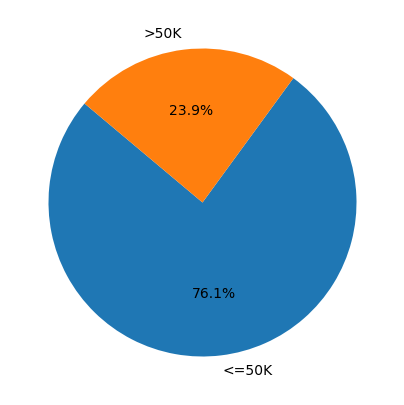

In [429]:
inc_amounts = data_f['income'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(inc_amounts, labels=inc_amounts.index, autopct='%1.1f%%', startangle=140)

76.1% has a salary greater than $50K and only 23.9% has a salary less than $50k , therefore it means that there is an imblanace in the dataset. 

In [430]:
data_f[data_f == '?'] = np.nan
data_f = data_f.dropna()
data_f

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
5,34,Private,198693.0,10th,6.0,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302.0,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,<=50K
48838,40,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
48839,58,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
48840,22,Private,201490.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,<=50K


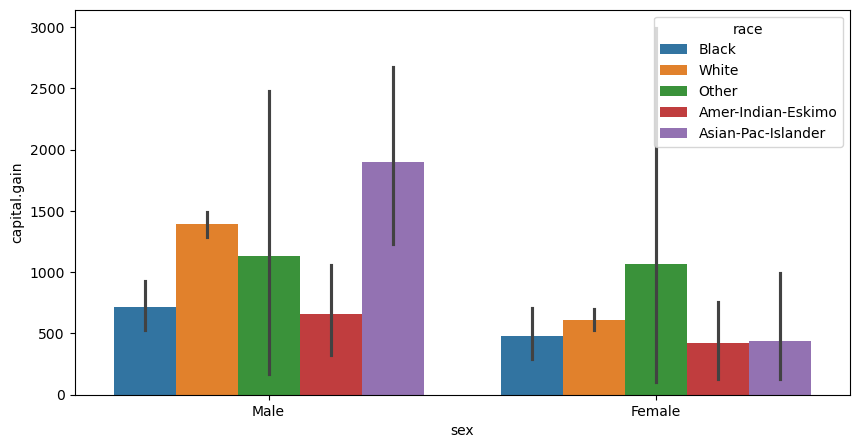

In [431]:
plt.figure(figsize=(10,5))
sns.barplot(x ='sex' , y='capital.gain', data = data_f,hue='race')
plt.xlabel=('Sex')
plt.ylabel=('Capital Gain')

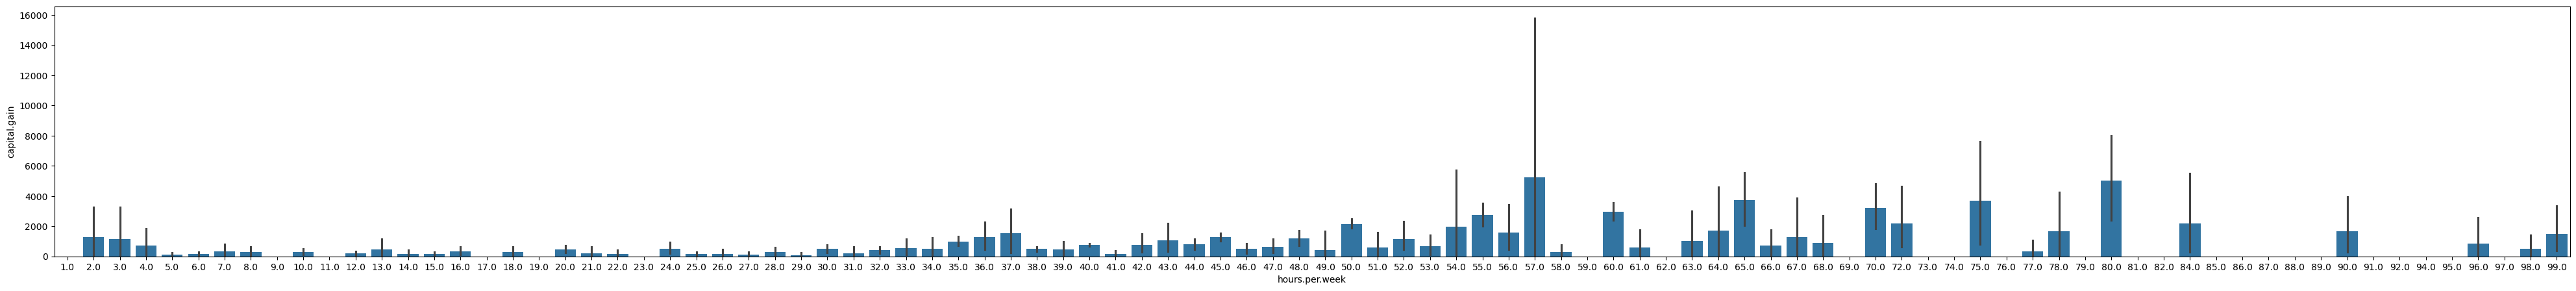

In [432]:
plt.figure(figsize=(50,5))
sns.barplot(x ='hours.per.week' , y='capital.gain', data = data_f)
plt.xlabel=('Sex')
plt.ylabel=('Capital Gain')

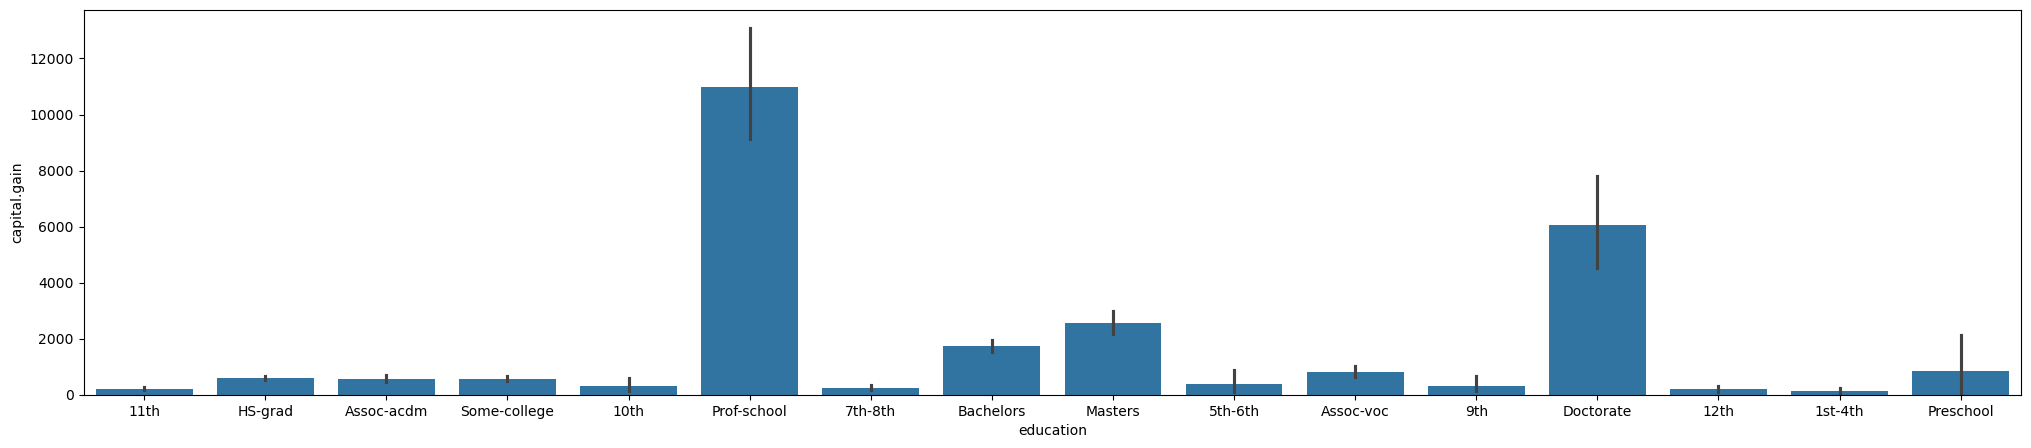

In [433]:
plt.figure(figsize=(25,5))
sns.barplot(x ='education' , y='capital.gain', data = data_f)
plt.xlabel=('Sex')
plt.ylabel=('Capital Gain')

In [434]:
data_f['income'].replace({'<=50K':0, '>50K':1}, inplace=True)
data_f

/var/folders/dc/5z3pbmdn0y7432jf8nxdqh9r0000gn/T/ipykernel_44297/1548234469.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_f['income'].replace({'<=50K':0, '>50K':1}, inplace=True)
/var/folders/dc/5z3pbmdn0y7432jf8nxdqh9r0000gn/T/ipykernel_44297/1548234469.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downc

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,0
1,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,0
2,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,1
3,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,1
5,34,Private,198693.0,10th,6.0,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302.0,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,0
48838,40,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,1
48839,58,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,0
48840,22,Private,201490.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,0


Feature Extraction 

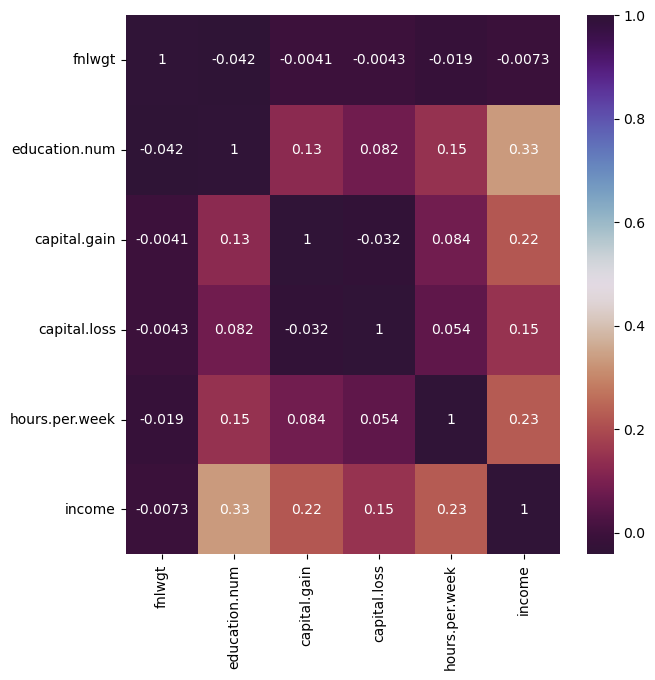

In [435]:
corr_df = data_f.select_dtypes(include = 'number')
correlation_matrix = corr_df.corr()
plt.figure(figsize=(7,7)) 
sns.heatmap(correlation_matrix, annot=True, cmap='twilight_shifted_r')
plt.show()

Can drop the education column as its redundant

In [436]:
data_f = data_f.drop('education', axis=1)
data_f.head()

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,25,Private,226802.0,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,0
1,38,Private,89814.0,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,0
2,28,Local-gov,336951.0,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,1
3,44,Private,160323.0,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,1
5,34,Private,198693.0,6.0,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,0


fnlwgt has a (-)ve correlation with income, therefore it can be dropped 

In [437]:
data_f = data_f.drop('fnlwgt', axis=1)
data_f.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,25,Private,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,0
1,38,Private,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,0
2,28,Local-gov,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,1
3,44,Private,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,1
5,34,Private,6.0,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,0


In [438]:
data_f['age'] = data_f['age'].astype(int)
data_f.dtypes

age                 int64
workclass          object
education.num     float64
marital.status     object
occupation         object
relationship       object
race               object
sex                object
capital.gain      float64
capital.loss      float64
hours.per.week    float64
native.country     object
income              int64
dtype: object

One Hot Encoding , for categorical columns


In [439]:

str_cols = data_f.columns[data_f.dtypes == object].tolist()
data_f = pd.get_dummies(data_f, columns=str_cols)
data_f

,age,education.num,capital.gain,capital.loss,hours.per.week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,25,7.0,0.0,0.0,40.0,0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
1,38,9.0,0.0,0.0,50.0,0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
2,28,12.0,0.0,0.0,40.0,1,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,44,10.0,7688.0,0.0,40.0,1,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
5,34,6.0,0.0,0.0,30.0,0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12.0,0.0,0.0,38.0,0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
48838,40,9.0,0.0,0.0,40.0,1,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
48839,58,9.0,0.0,0.0,40.0,0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
48840,22,9.0,0.0,0.0,20.0,0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False


Min Max scaler , for numerical columns 

In [440]:
from sklearn.preprocessing import MinMaxScaler

scalable_columns = ['age','capital.gain','capital.loss','hours.per.week', "education.num"] 
min_max_scaler = MinMaxScaler() 
scaled_columns = min_max_scaler.fit_transform(data_f[scalable_columns]) 

data_f['age']=scaled_columns[:,0]
data_f['capital.gain']=scaled_columns[:,1]
data_f['capital.loss']=scaled_columns[:,2]
data_f['hours.per.week']=scaled_columns[:,3]
data_f["education.num"]=scaled_columns[:,4]

data_f

,age,education.num,capital.gain,capital.loss,hours.per.week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,0.109589,0.400000,0.000000,0.0,0.397959,0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
1,0.287671,0.533333,0.000000,0.0,0.500000,0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
2,0.150685,0.733333,0.000000,0.0,0.397959,1,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,0.369863,0.600000,0.076881,0.0,0.397959,1,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
5,0.232877,0.333333,0.000000,0.0,0.295918,0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0.136986,0.733333,0.000000,0.0,0.377551,0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
48838,0.315068,0.533333,0.000000,0.0,0.397959,1,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
48839,0.561644,0.533333,0.000000,0.0,0.397959,0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
48840,0.068493,0.533333,0.000000,0.0,0.193878,0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False


In [441]:
target = data_f['income']
data_f = data_f.drop('income', axis=1)
data_f

,age,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,0.109589,0.400000,0.000000,0.0,0.397959,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1,0.287671,0.533333,0.000000,0.0,0.500000,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,0.150685,0.733333,0.000000,0.0,0.397959,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,0.369863,0.600000,0.076881,0.0,0.397959,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
5,0.232877,0.333333,0.000000,0.0,0.295918,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0.136986,0.733333,0.000000,0.0,0.377551,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
48838,0.315068,0.533333,0.000000,0.0,0.397959,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
48839,0.561644,0.533333,0.000000,0.0,0.397959,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
48840,0.068493,0.533333,0.000000,0.0,0.193878,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [442]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_f, target, test_size=0.2, random_state=42)

In [443]:
len(X_train), len(X_test), len(y_train), len(y_test)

(36177, 9045, 36177, 9045)

In [444]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

r_forest_Model = RandomForestClassifier(oob_score=True,n_estimators=300, max_depth=20)
r_forest_Model.fit(X_train, y_train)
print(r_forest_Model.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 300, 'n_jobs': None, 'oob_score': True, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [445]:
r_forest_Model.score(X_train, y_train)

0.9050778118694198

In [446]:
Y_Pred = r_forest_Model.predict(X_test)
accuracy_score(y_test, Y_Pred)

0.8679933665008291

In [447]:
from sklearn.model_selection import cross_val_score

CV_S = cross_val_score(r_forest_Model, X_train, y_train, cv=5)
print("Cross-Validation Scores: ", CV_S)
print("Mean Cross-Validation Score: ", np.mean(CV_S))

Cross-Validation Scores:  [0.86124931 0.86415146 0.85901866 0.8609537  0.85943331]
Mean Cross-Validation Score:  0.8609612881610529


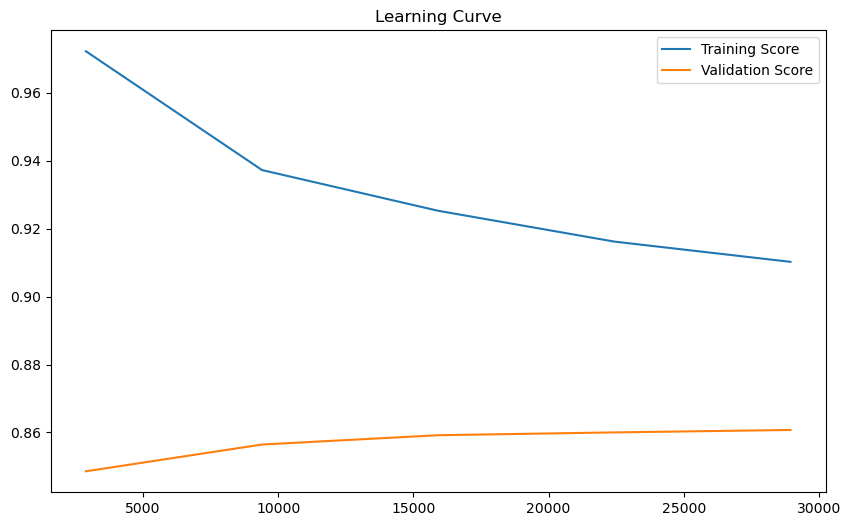

In [448]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, val_scores = learning_curve(r_forest_Model, X_train, y_train, cv=5)

# Calculate mean and standard deviation of training scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation of validation scores
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, val_mean, label='Validation Score')
plt.xlabel = 'Training Set Size'
plt.ylabel = 'Accuracy'
plt.title('Learning Curve')
plt.legend()
plt.show()


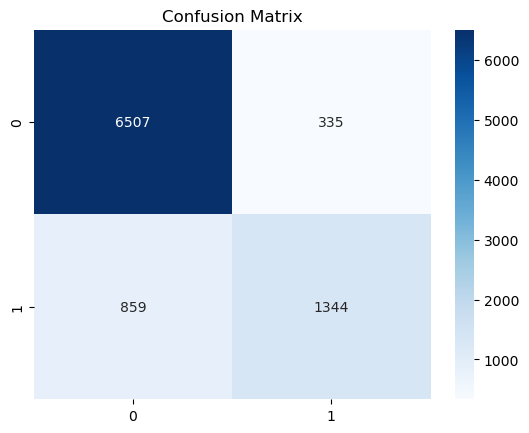

[[6507  335]
 [ 859 1344]]


In [449]:
import seaborn as sns

cm = confusion_matrix(y_test, Y_Pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel = 'Predicted'
plt.ylabel = 'Actual'
plt.title('Confusion Matrix')
plt.show()
print(confusion_matrix(y_test, Y_Pred))


In [450]:
print(classification_report(y_test, Y_Pred))


              precision    recall  f1-score   support

           0       0.88      0.95      0.92      6842
           1       0.80      0.61      0.69      2203

    accuracy                           0.87      9045
   macro avg       0.84      0.78      0.80      9045
weighted avg       0.86      0.87      0.86      9045

